# Working on forecasting sales for Tesco problem

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
# Connection to database
conn = sqlite3.connect("/Users/alice/Desktop/TESCO/tesco_sales_data_sample.db")

In [2]:
# Reading the columns we are interested into from the database
# We do not consider deprecated or not to use data --> unuse_indicator IN ('N', 'Z')
# We consider just product in normal sales (not in promotions) --> offer_number = 0
df2 = pd.read_sql_query("SELECT retail_outlet_number, store_format_code, base_product_number, product_sub_group_code, year_week_number, year_number, period_number, week_number, day_number, adjusted_sales_singles AS adjusted, actual_sales_singles AS actual, expected_daily_sales_qty AS forecast, ptp, is_ptg, step_indicator, unuse_indicator, wthr_factor, offer_number, offer_type, discount, transactions, valentines, halloween, bonfire_night, christmas, new_year, may_day, spring_bank, august_bank, fathers, mothers, easter FROM dataset WHERE unuse_indicator IN ('N', 'Z') and offer_number = 0", conn)

In [3]:
# Substitute wrong weather factor from 0 to 1 --> 1 means that the weather has no impact at all to forecasts
df2['wthr_factor'].replace(0, 1)


0          0.965240
1          0.993884
2          1.000000
3          1.000000
4          1.036834
5          1.000807
6          1.000000
7          0.990797
8          1.000000
9          1.000000
10         1.000000
11         1.000000
12         1.000000
13         0.964531
14         1.000000
15         1.000000
16         0.987375
17         1.000000
18         1.000000
19         0.999658
20         0.996123
21         1.000000
22         1.000000
23         1.007178
24         1.000000
25         1.097269
26         1.029636
27         0.991996
28         1.000000
29         1.000000
             ...   
9736374    1.000000
9736375    1.019572
9736376    1.078442
9736377    1.000000
9736378    1.015497
9736379    1.000000
9736380    1.000000
9736381    1.000000
9736382    1.111305
9736383    0.999950
9736384    0.974653
9736385    0.989378
9736386    0.987366
9736387    1.187084
9736388    1.000000
9736389    1.140125
9736390    0.973578
9736391    0.908136
9736392    1.000000


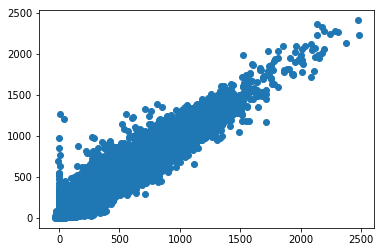

In [4]:
# Scatter plot of (actual, expected)
plt.scatter(df2['actual'],df2['forecast'])
plt.show()

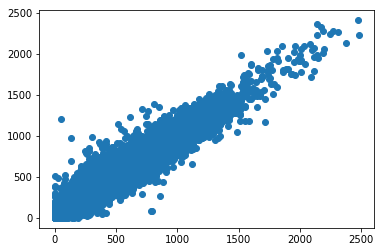

In [5]:
# Scatter plot of (adjusted, expected)
plt.scatter(df2['adjusted'],df2['forecast'])
plt.show()

Text(0.5,1,'Store format code = S')

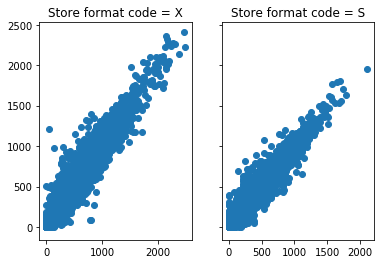

In [14]:
# Scatter plots by store format code
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(df2[df2['store_format_code']=='X']['adjusted'], df2[df2['store_format_code']=='X']['forecast'])
ax2.scatter(df2[df2['store_format_code']=='S']['adjusted'], df2[df2['store_format_code']=='S']['forecast'])
ax1.set_title('Store format code = X')
ax2.set_title('Store format code = S')

Text(0.5,1,'Product number 245')

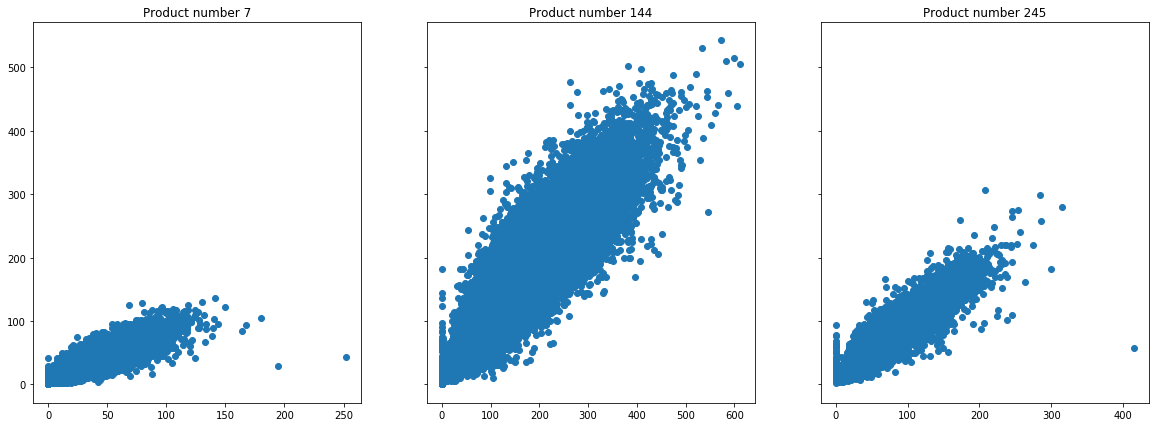

In [77]:
# Scatter plots for three particular products
f1, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,7), sharey=True)
ax1.scatter(df2[df2['base_product_number']==7]['adjusted'], df2[df2['base_product_number']==7]['forecast'])
ax2.scatter(df2[df2['base_product_number']==144]['adjusted'], df2[df2['base_product_number']==144]['forecast'])
ax3.scatter(df2[df2['base_product_number']==245]['adjusted'], df2[df2['base_product_number']==245]['forecast'])
ax1.set_title('Product number 7')
ax2.set_title('Product number 144')
ax3.set_title('Product number 245')

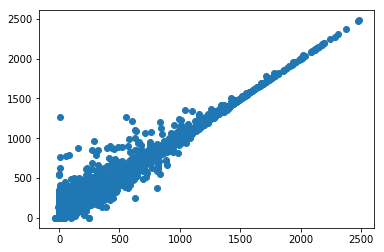

In [17]:
# Scatter plot of (actual, adjusted)
plt.scatter(df2['actual'],df2['adjusted'])
plt.show()

Text(0.5,1,'Product number 245')

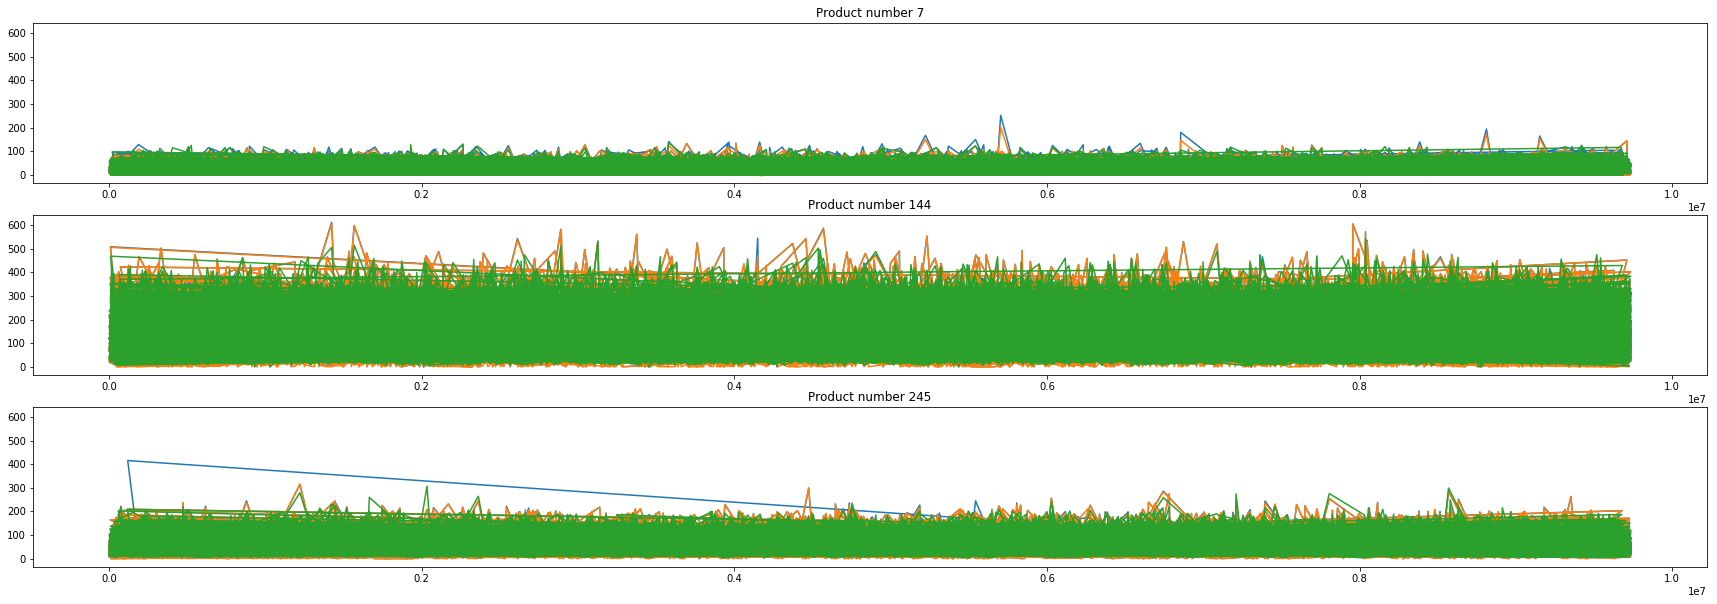

In [7]:
# Actual, adjusted and forecast for the three products
df_prod7 = df2[df2['base_product_number']==7].sort_values(['year_number', 'week_number', 'day_number'])
df_prod144 = df2[df2['base_product_number']==144].sort_values(['year_number', 'week_number', 'day_number'])
df_prod245 = df2[df2['base_product_number']==245].sort_values(['year_number', 'week_number', 'day_number'])

fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharey=True, figsize=(30,10))
ax1.plot(df_prod7['adjusted'])
ax1.plot(df_prod7['actual'])
ax1.plot(df_prod7['forecast'])

ax2.plot(df_prod144['adjusted'])
ax2.plot(df_prod144['actual'])
ax2.plot(df_prod144['forecast'])

ax3.plot(df_prod245['adjusted'])
ax3.plot(df_prod245['actual'])
ax3.plot(df_prod245['forecast'])

ax1.set_title('Product number 7')
ax2.set_title('Product number 144')
ax3.set_title('Product number 245')

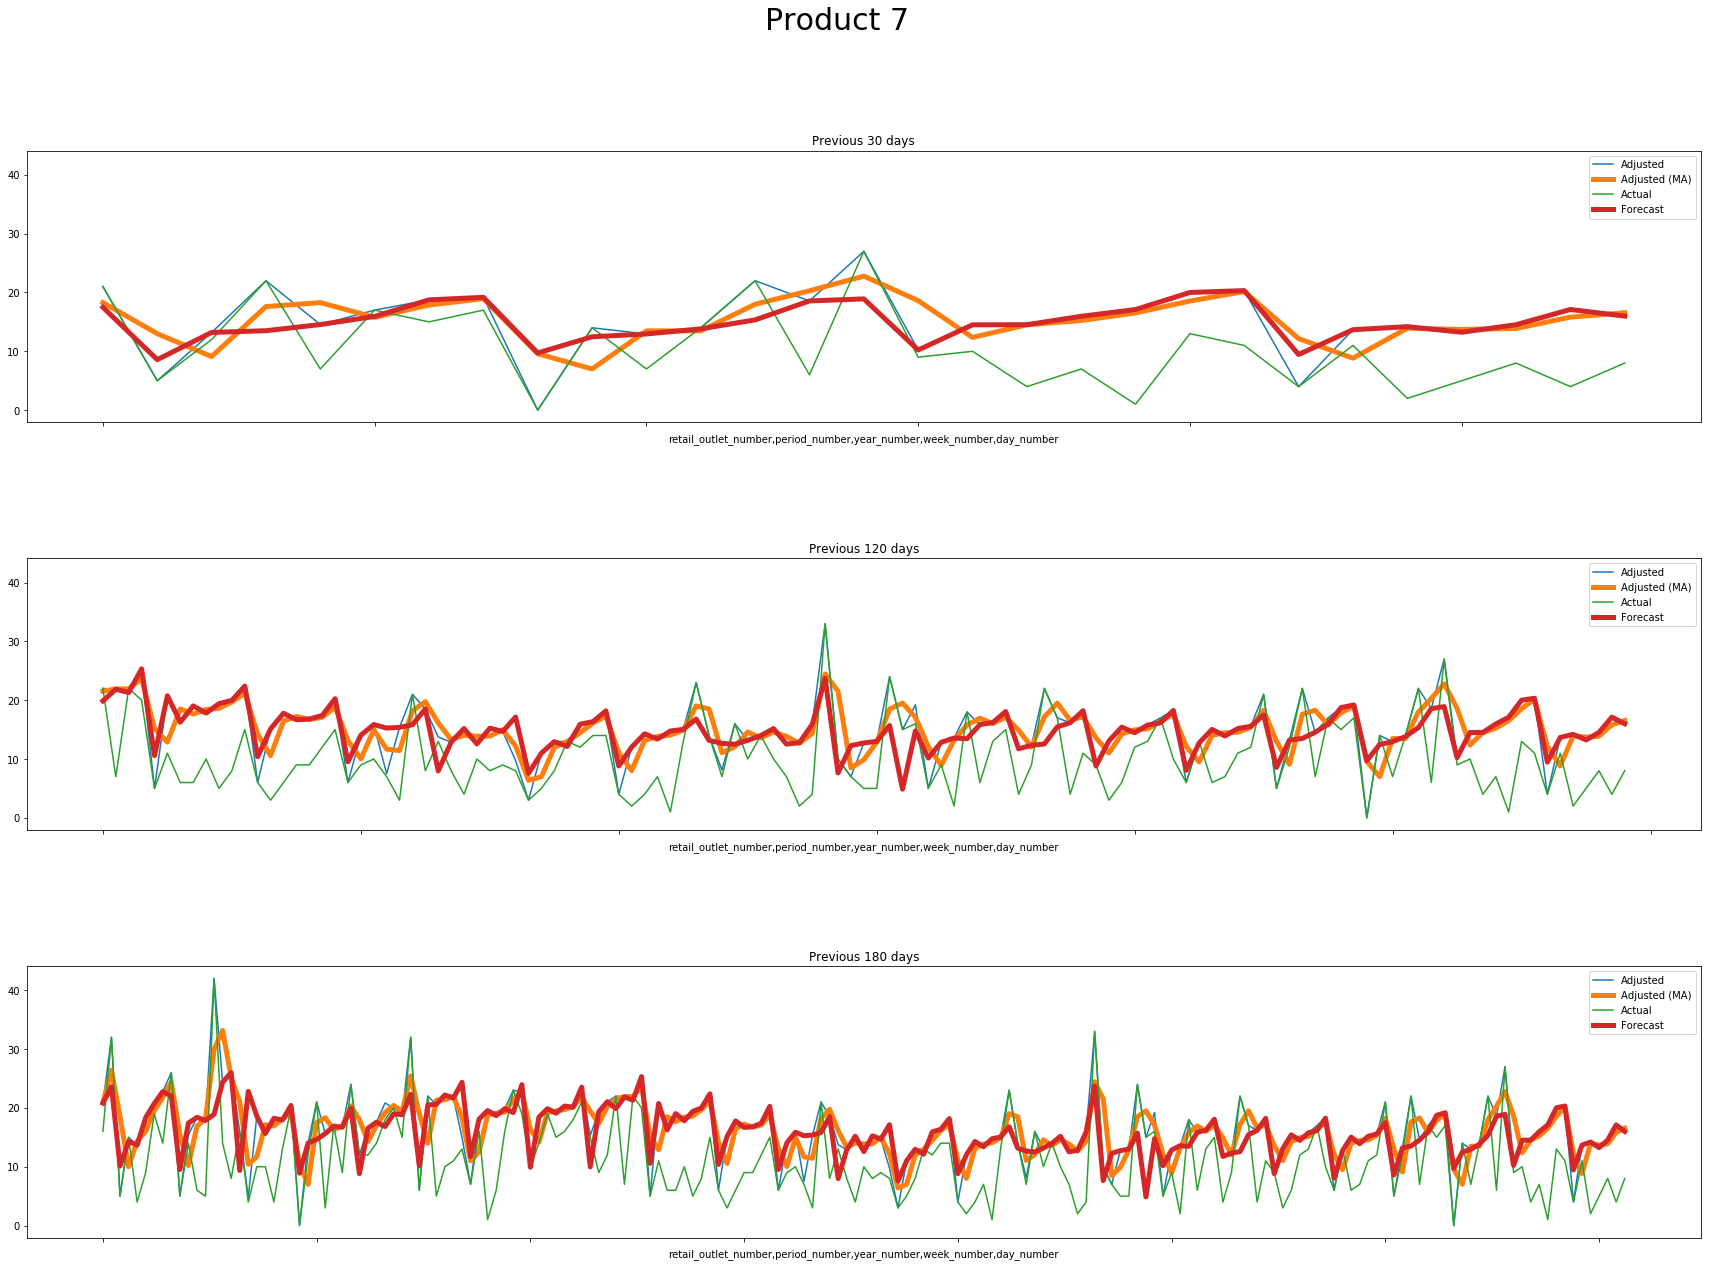

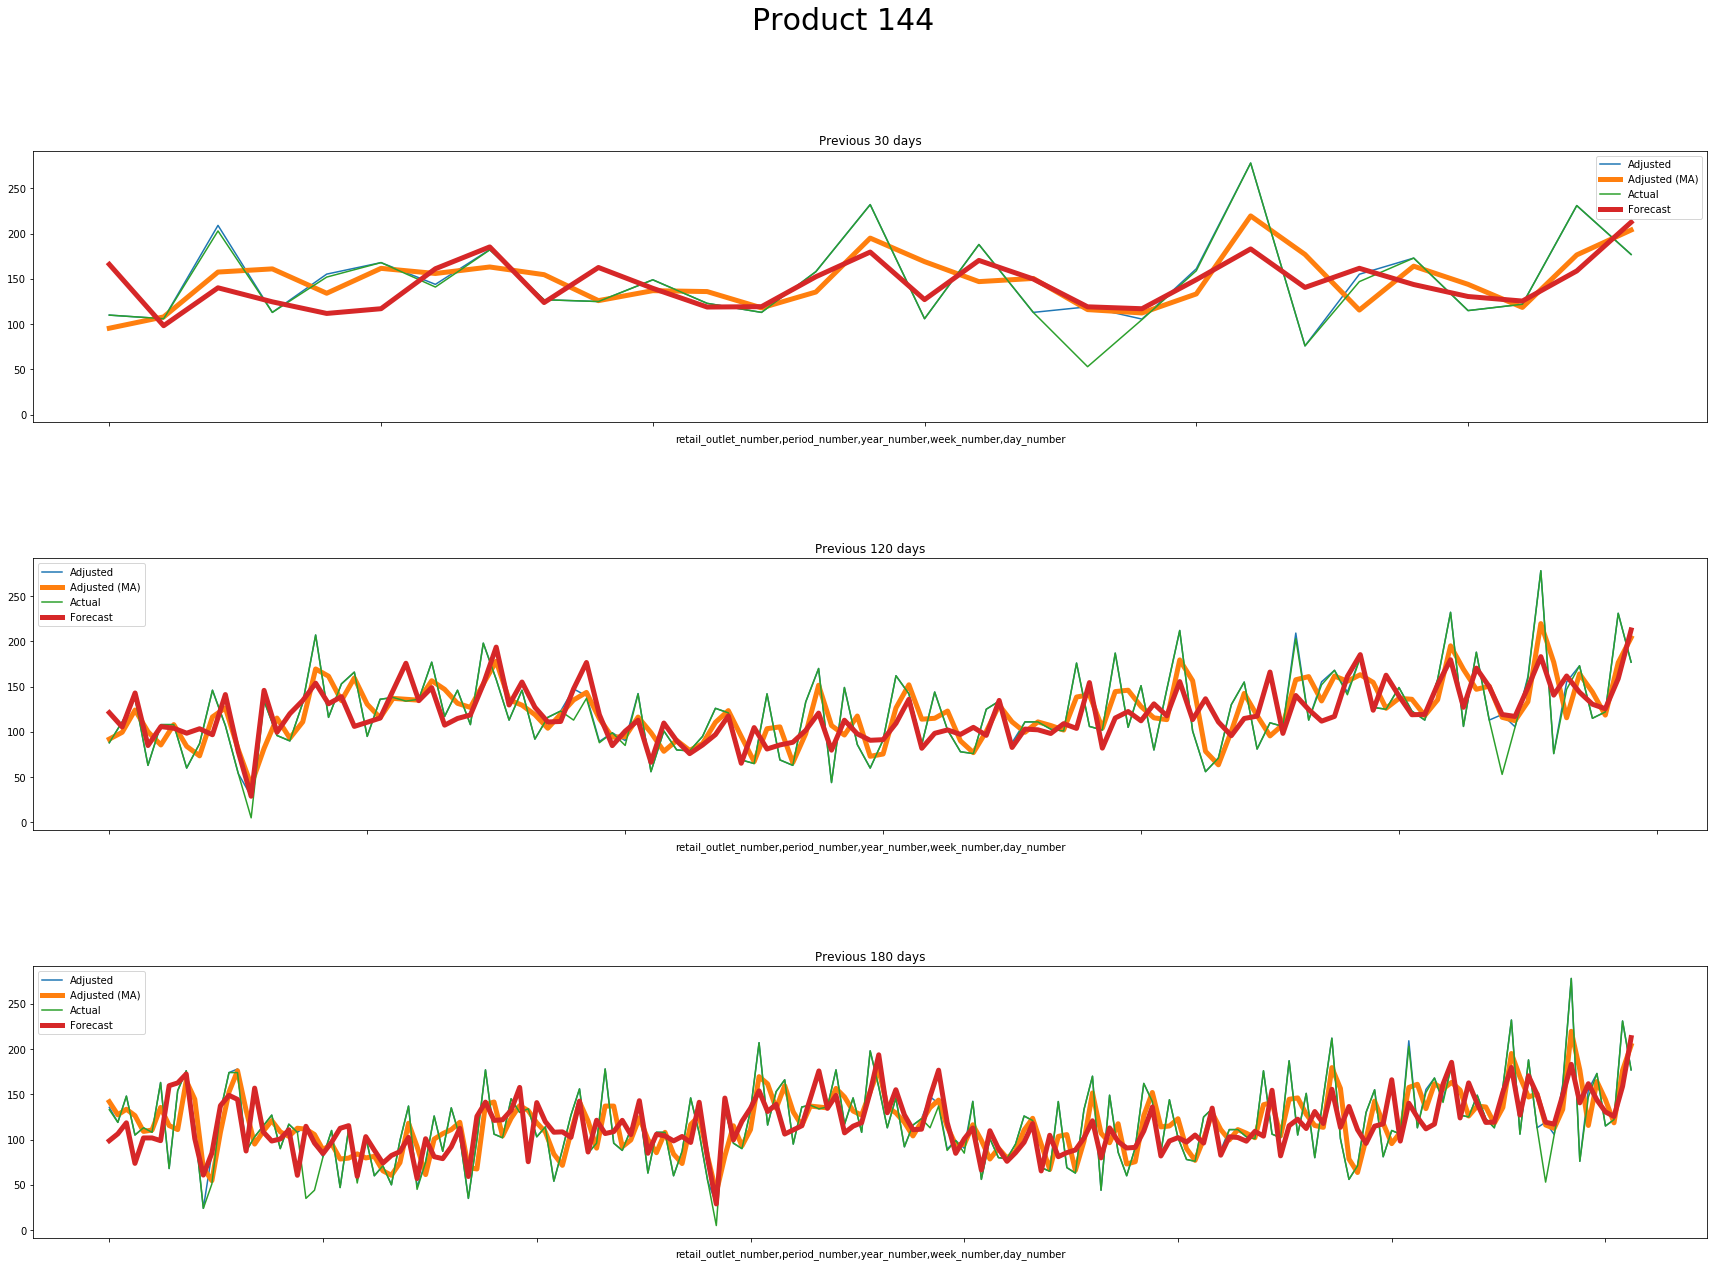

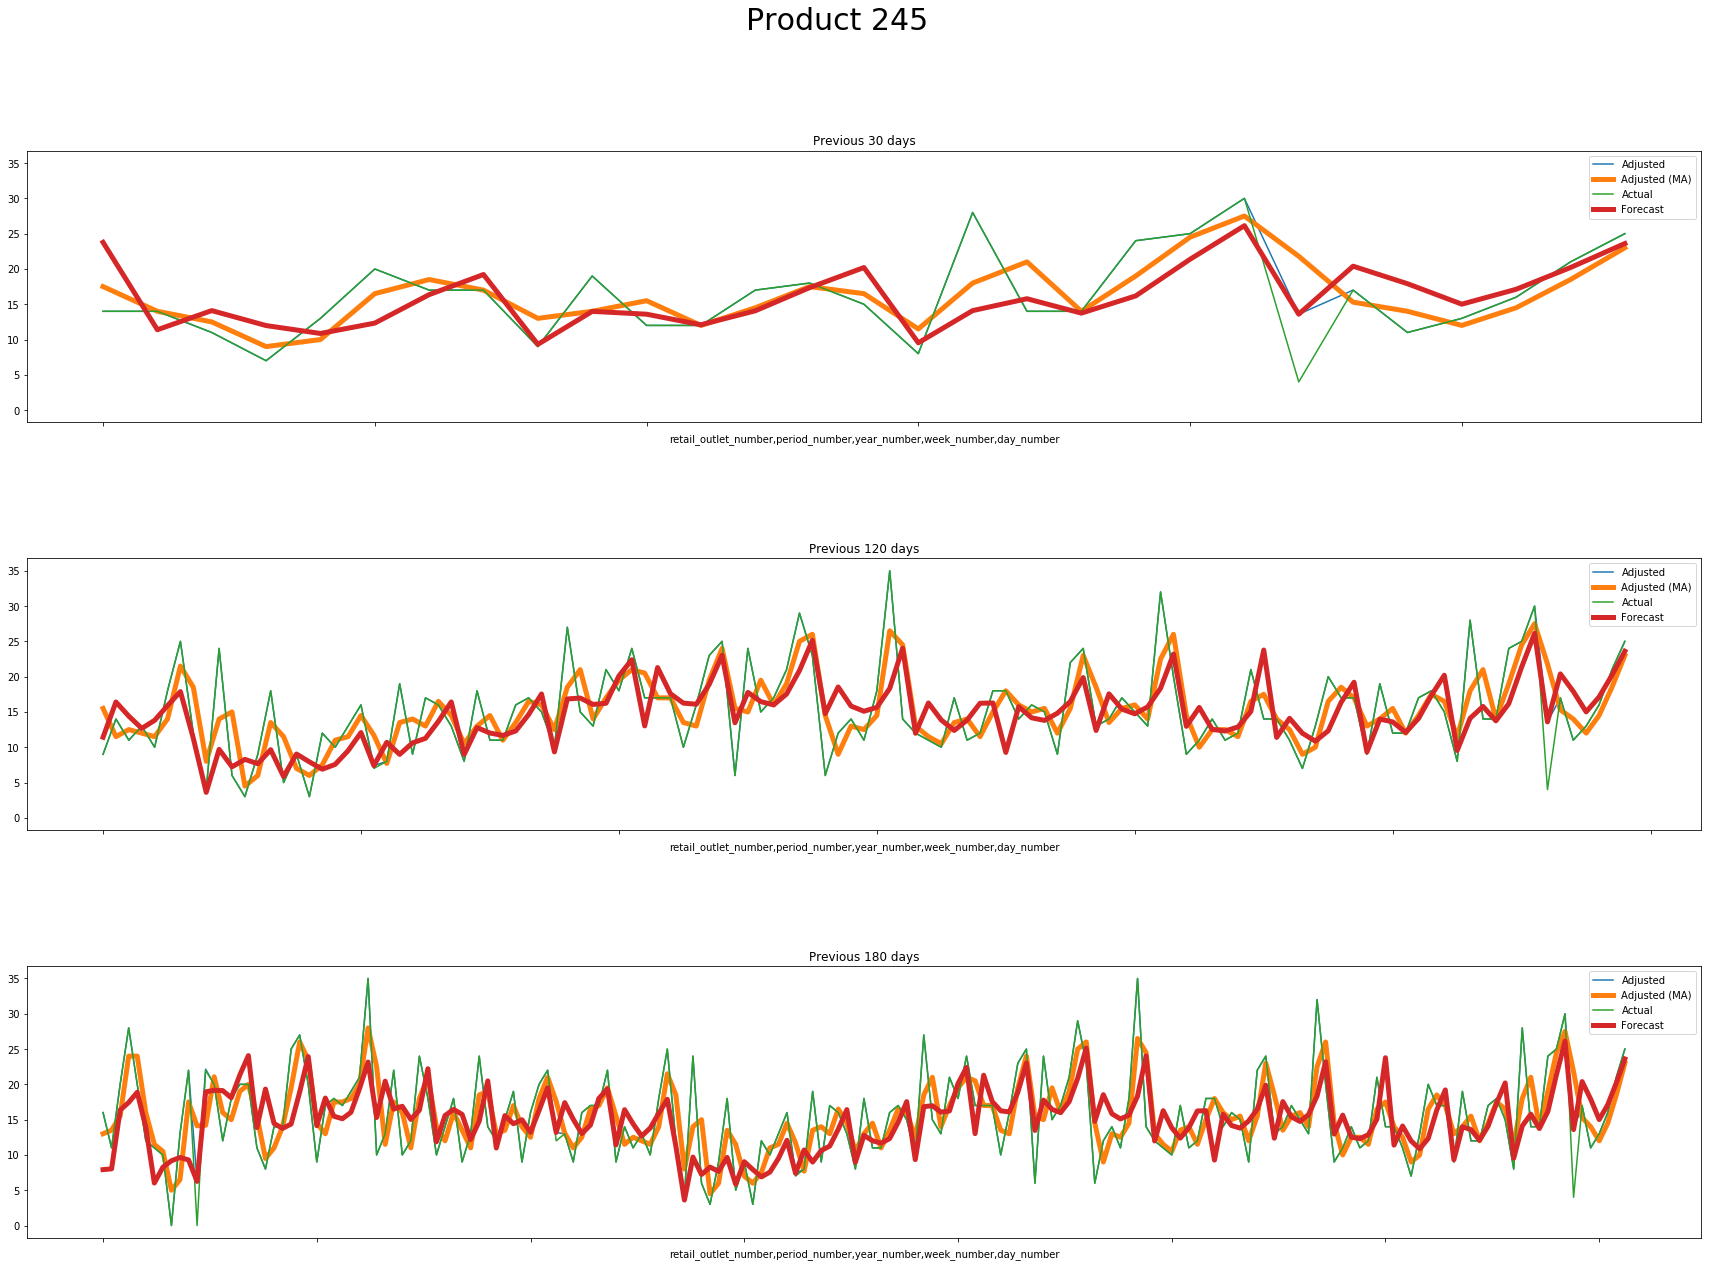

In [9]:
# Actual, adjusted and forecast for the three products

df_avg_prod7 = df_prod7.groupby(['retail_outlet_number','period_number','year_number', 'week_number', 'day_number']).mean()
df_avg_prod144 = df_prod144.groupby(['retail_outlet_number','period_number','year_number', 'week_number', 'day_number']).mean()
df_avg_prod245 = df_prod245.groupby(['retail_outlet_number','period_number','year_number', 'week_number', 'day_number']).mean()

fig, axs = plt.subplots(3,1, sharey=True, figsize=(30, 20))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
fig.suptitle('Product 7', fontsize=30)
days = [30,120,180]
for i in range(3):
    axs[i].set_title('Previous ' + str(days[i]) + ' days')
    df_avg_prod7[-days[i]:-1].plot(y='adjusted', ax=axs[i])
    avg_prod7_rolling_mean = df_avg_prod7.rolling(window=2).mean()
    avg_prod7_rolling_mean['adjusted'][-days[i]:-1].plot(ax=axs[i], linewidth=5.0)
    df_avg_prod7[-days[i]:-1].plot(y='actual', ax=axs[i])
    
    df_avg_prod7[-days[i]:-1].plot(y='forecast', ax=axs[i], linewidth=5.0)
    axs[i].legend(["Adjusted", "Adjusted (MA)", "Actual", "Forecast"]);

fig, axs = plt.subplots(3,1, sharey=True, figsize=(30, 20))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
fig.suptitle('Product 144', fontsize=30)
days = [30,120,180]
for i in range(3):
    axs[i].set_title('Previous ' + str(days[i]) + ' days')
    df_avg_prod144[-days[i]:-1].plot(y='adjusted', ax=axs[i])
    avg_prod144_rolling_mean = df_avg_prod144.rolling(window=2).mean()
    avg_prod144_rolling_mean['adjusted'][-days[i]:-1].plot(ax=axs[i], linewidth=5.0)
    df_avg_prod144[-days[i]:-1].plot(y='actual', ax=axs[i])
    
    df_avg_prod144[-days[i]:-1].plot(y='forecast', ax=axs[i], linewidth=5.0)
    axs[i].legend(["Adjusted", "Adjusted (MA)", "Actual", "Forecast"]);

fig, axs = plt.subplots(3,1, sharey=True, figsize=(30, 20))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
fig.suptitle('Product 245', fontsize=30)
days = [30,120,180]
for i in range(3):
    axs[i].set_title('Previous ' + str(days[i]) + ' days')
    df_avg_prod245[-days[i]:-1].plot(y='adjusted', ax=axs[i])
    avg_prod245_rolling_mean = df_avg_prod245.rolling(window=2).mean()
    avg_prod245_rolling_mean['adjusted'][-days[i]:-1].plot(ax=axs[i], linewidth=5.0)
    df_avg_prod245[-days[i]:-1].plot(y='actual', ax=axs[i])
    
    df_avg_prod245[-days[i]:-1].plot(y='forecast', ax=axs[i], linewidth=5.0)
    axs[i].legend(["Adjusted", "Adjusted (MA)", "Actual", "Forecast"]);

In [10]:
# Aggregation according to store_format_code ('X' and 'S' found in the dataset, not 'E')
subgroups = df2.groupby(by='store_format_code')['retail_outlet_number','base_product_number','adjusted','actual','forecast'].mean()

In [11]:
subgroups


,retail_outlet_number,base_product_number,adjusted,actual,forecast
store_format_code,,,,,
S,62.718641,127.099351,25.594099,25.11265,25.657388
X,66.969102,127.780987,33.944873,33.36733,34.081386


In [12]:
subgroups.describe()

,retail_outlet_number,base_product_number,adjusted,actual,forecast
count,2.000000,2.000000,2.000000,2.000000,2.000000
mean,64.843872,127.440169,29.769486,29.239990,29.869387
std,3.005530,0.481990,5.904889,5.836941,5.956666
min,62.718641,127.099351,25.594099,25.112650,25.657388
25%,63.781257,127.269760,27.681792,27.176320,27.763388
50%,64.843872,127.440169,29.769486,29.239990,29.869387
75%,65.906487,127.610578,31.857179,31.303660,31.975386
max,66.969102,127.780987,33.944873,33.367330,34.081386


Text(0.5,0.98,'')

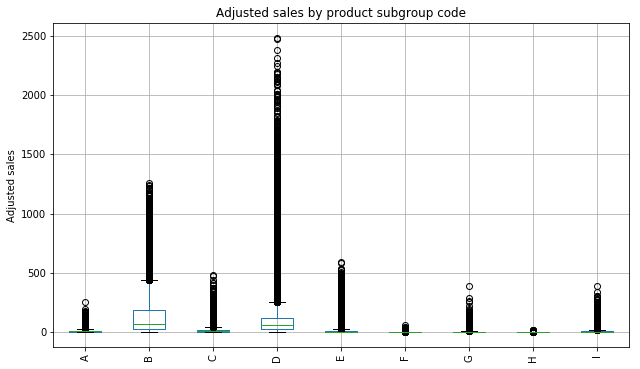

In [13]:
ax = df2[['adjusted', 'product_sub_group_code']].boxplot(
        by='product_sub_group_code', figsize=(10,6), rot=90);
ax.set_xlabel('');
ax.set_ylabel('Adjusted sales');
ax.set_title('Adjusted sales by product subgroup code');
plt.suptitle('')

In [14]:
retails = df2.groupby(by='retail_outlet_number')['store_format_code','base_product_number','adjusted','actual','forecast'].mean()

In [108]:
retails

,base_product_number,adjusted,actual,forecast
retail_outlet_number,,,,
1,127.349351,22.957729,22.663700,22.942815
2,124.466429,25.045321,24.320041,25.069721
3,127.569793,28.568958,28.151114,28.684950
4,127.177040,26.454570,25.792754,26.510169
5,124.847099,28.447375,27.848611,28.508543
6,125.382443,26.007363,25.346511,26.076805
7,125.991050,26.648391,26.168750,26.746224
8,127.164496,18.125025,17.776346,18.179871
9,127.165946,50.449177,49.781146,50.582376


In [15]:
retails.describe()

,base_product_number,adjusted,actual,forecast
count,126.000000,126.000000,126.000000,126.000000
mean,127.308671,28.398693,27.884126,28.486240
std,1.146544,9.134006,9.030757,9.192947
min,124.466429,10.728038,10.469760,10.717850
25%,126.623398,22.286280,21.841595,22.274914
50%,127.399311,26.565840,25.968113,26.656088
75%,128.163659,34.065029,33.603337,34.219520
max,129.496070,52.028333,51.229598,52.429291


Text(0.5,0.98,'')

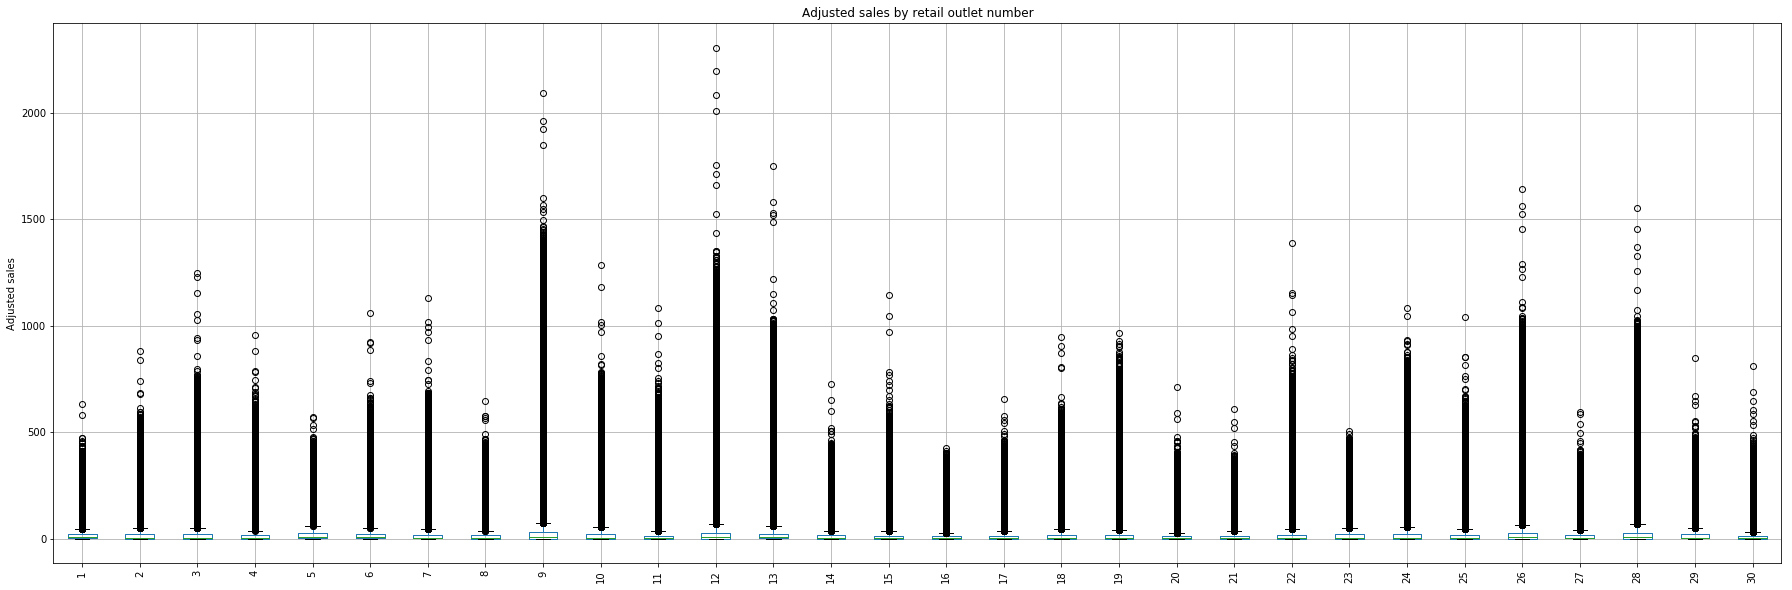

In [16]:
ax = df2[['adjusted', 'retail_outlet_number']][df2['retail_outlet_number'] <= 30].boxplot(
        by='retail_outlet_number', figsize=(30,10), rot=90);
ax.set_xlabel('');
ax.set_ylabel('Adjusted sales');
ax.set_title('Adjusted sales by retail outlet number');
plt.suptitle('')

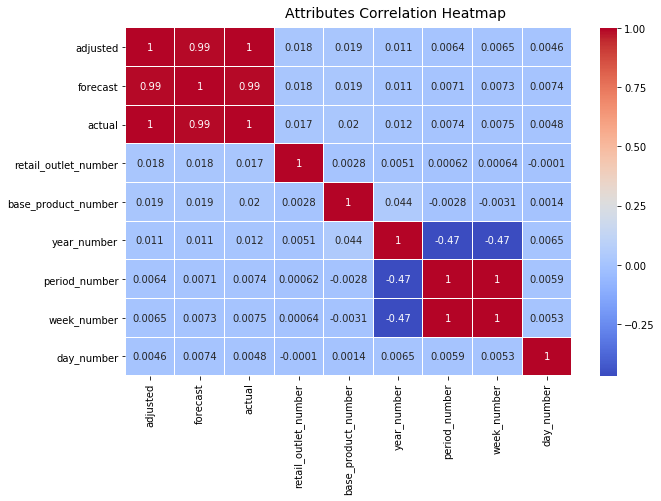

In [17]:
import seaborn as sns
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df2[['adjusted', 'forecast', 'actual', 'retail_outlet_number', 'base_product_number', 'year_number', 'period_number', 'week_number', 'day_number']].corr()
#corr = corr.apply(pd.to_numeric, errors='coerce')

hm = sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm", linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Attributes Correlation Heatmap', fontsize=14)

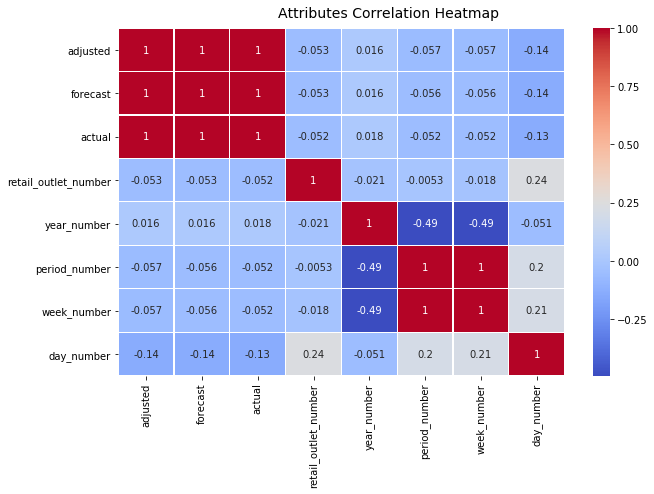

In [19]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
df_products = df2.groupby('base_product_number').mean()

corr = df_products[['adjusted', 'forecast', 'actual', 'retail_outlet_number', 'year_number', 'period_number', 'week_number', 'day_number']].corr()
#corr = corr.apply(pd.to_numeric, errors='coerce')

hm = sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm", linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Attributes Correlation Heatmap', fontsize=14)

In [75]:
# Developing a NN for just one category ('D')

# Aggregation according to subgroup
products_D = df2[df2['product_sub_group_code']=='D']
Y = products_D['forecast']
X0 = products_D.drop(columns=['forecast', 'product_sub_group_code'])
X0['store_format_code'].replace('X', 0)
X0['store_format_code'].replace('S', 1)
#X = X.values
X = X0[['actual', 'adjusted', 'year_number', 'period_number', 'week_number', 'day_number']]
X = X.values

In [88]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
mlp = MLPRegressor(alpha=0.001, hidden_layer_sizes = (5,), max_iter = 500, 
                 activation = 'logistic', verbose = 'False', learning_rate = 'adaptive')
a = mlp.fit(X_train, Y_train)

Iteration 1, loss = 15446.13222975
Iteration 2, loss = 12825.87071198
Iteration 3, loss = 10852.75371844
Iteration 4, loss = 9278.80540610
Iteration 5, loss = 7981.98643733
Iteration 6, loss = 6895.51075875
Iteration 7, loss = 5986.06462894
Iteration 8, loss = 5218.97644744
Iteration 9, loss = 4575.05902687
Iteration 10, loss = 4035.35915250
Iteration 11, loss = 3585.62369748
Iteration 12, loss = 3206.71516912
Iteration 13, loss = 2883.28751543
Iteration 14, loss = 2598.74133988
Iteration 15, loss = 2344.62376864
Iteration 16, loss = 2116.52688555
Iteration 17, loss = 1913.34985289
Iteration 18, loss = 1732.07192166
Iteration 19, loss = 1570.37820977
Iteration 20, loss = 1427.80509249
Iteration 21, loss = 1297.84732640
Iteration 22, loss = 1151.04560541
Iteration 23, loss = 1043.45069934
Iteration 24, loss = 952.30818578
Iteration 25, loss = 871.52660862
Iteration 26, loss = 799.48874486
Iteration 27, loss = 735.98487695
Iteration 28, loss = 679.19404841
Iteration 29, loss = 629.020169